自己寫的方式

In [ ]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
data_dir = '../Data/
D = np.loadtxt(data_dir + 'la_1.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
C1, C2 = X[y==0,:], X[y==1,:]
plt.plot(C1[:,0], C1[:,1], 'r>', label = 'Group A')
plt.plot(C2[:,0], C2[:,1],'b<', label = 'Group B')
# Estimatr the group parameters
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2

套件方式

In [7]:
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
        import QuadraticDiscriminantAnalysis
# data_dir = '../Data/'
D = np.loadtxt( '/Users/liang/Downloads/ml_data/la_1.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA = 1 - Lda.score(X, y)
x = np.array([-3, 5])
f = -(K- 0.5 + L[0] * x) / L[1]
# plt.plot(x, f, linewidth = 3,label='{:.4f}%'.format(100 * np.mean(y_pre1 == y)),color='#C875C4')

#增廣型---------------------------------------------------------
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X1 = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:,2]
n = len(y)
Xgd = np.hstack((np.ones((n, 1)), \
x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
# Linear Regression by sklearn
Mda = LinearRegression()# 建立新的 linear regression model
Mda.fit(X1, y) # 進行估計 （ 配適 ）
intrcp1 = Mda.intercept_ # 估計結果 ：beta0
coeffs1 = Mda.coef_ # # 估計結果 ：beta1, beta2, ...
b = LA.pinv(Xgd) @ y # pseudo inverse 
# Calculate testing error
y_hat = Mda.predict(X1) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$',weight='bold'), plt.ylabel('$X_2$',weight='heavy')
print("accuracy in training for Augmented linear regression: {:.4f}%".format(100 * np.mean(y_pre == y)))

#------Draw count plot---------------------------
f = (
lambda x: intrcp1
+ coeffs1[0] * x[0]
+ coeffs1[1] * x[1]
+ coeffs1[2] * x[0] * x[1]
+ coeffs1[3] * x[0] ** 2
+ coeffs1[4] * x[1] ** 2)
xx = np.linspace(-3, 4, 100)
yy = np.linspace(-2, 3, 100)
X_, Y_ = np.meshgrid(xx, yy)
Z = f([X_, Y_])
contours = plt.contour(X_, Y_, Z, levels = [0.5], colors='#580F41', linestyles='--')
artists,_ = contours.legend_elements() 
contours.collections[0].set_label(\
        '{:.4f}%'.format(100*np.mean(y_pre == y)))  
plt.xticks(fontweight='semibold') ,plt.yticks(fontweight='semibold') 
plt.title('Linear and Augmented Regression lines',fontweight='semibold')
plt.legend([artists[0],z[0],],\
           ['{:.4f}%'.format(100*np.mean(y_pre == y)) , '{:.4f}%'.format(100 * np.mean(y_pre1 == y))],\
           loc='lower right',
          title='Accuracy rate',fontsize=13)

IndexError: index 1 is out of bounds for axis 0 with size 1

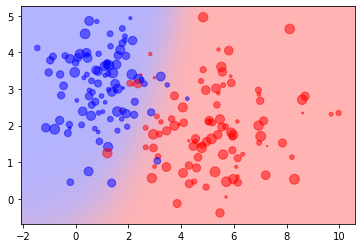

In [6]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
data_dir = '../Data/'
# D = np.loadtxt(data_dir + 'la_1.txt', comments='%')
D = np.loadtxt( '/Users/liang/Downloads/ml_data/la_1.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
area = 2 * np.random.randint(50, size = D[:, 0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
        alpha = 0.5, marker = 'o' )#area代表點的的小
Qda = QuadraticDiscriminantAnalysis(\
        tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes', cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',\
    norm = colors.Normalize(0., 1.),\
    shading = 'auto', zorder = 0)